In [4]:
import pandas as pd
import numpy as ny
import seaborn as sns


In [6]:
data=pd.read_csv("/content/Zomato data .csv")

EDA and Data cleaning

In [7]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [8]:
data.shape


(148, 7)

In [9]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [10]:
data.index

RangeIndex(start=0, stop=148, step=1)

In [ ]:
#data["reservation_status_date"]=pd.to_datetime(data["reservation_status_date"],format="%d%m%y",dayfirst=True,errors='coerce')
data["reservation_status_date"]=pd.to_datetime(data["reservation_status_date"])

In [12]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

data['rate']=data['rate'].apply(handleRate)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),frame
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,4.1
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,4.1
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,3.7
4,Grand Village,No,No,3.8,166,600,Buffet,3.8


In [13]:
data.describe(include='object')

,name,online_order,book_table,listed_in(type)
count,148,148,148,148
unique,145,2,2,4
top,San Churro Cafe,No,No,Dining
freq,2,90,140,110


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
 7   frame                        148 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 9.4+ KB


In [15]:
data.drop("frame",axis=1,inplace=True)
data


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [16]:
data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
#data.drop(["company","agent"],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3.0,No Deposit,0.0,Transient,0.0,0.0,0.0,Check-Out,NaT
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4.0,No Deposit,0.0,Transient,0.0,0.0,0.0,Check-Out,NaT
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0.0,No Deposit,0.0,Transient,75.0,0.0,0.0,Check-Out,NaT
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0.0,No Deposit,0.0,Transient,75.0,0.0,0.0,Check-Out,NaT
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0.0,No Deposit,0.0,Transient,98.0,0.0,1.0,Check-Out,NaT


Type of restaurent

Text(0.5, 0, 'Type of restaurent')

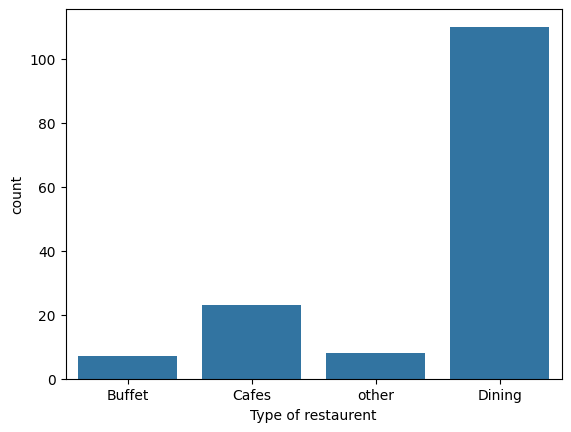

In [18]:
import matplotlib.pyplot as plt
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of restaurent")


## Majority of restaurents fall in dining category that means larger number of individuals prefer dining restaurents

Text(0.5, 1.0, 'votes for each rtype of restaurent')

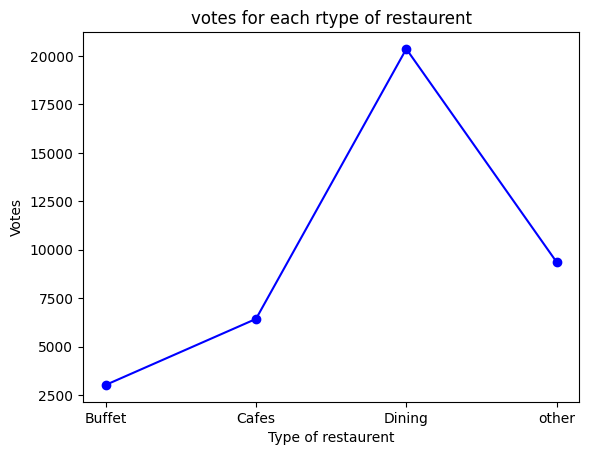

In [20]:
gd=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame(gd)
plt.plot(result,c="blue",marker='o')
plt.xlabel("Type of restaurent")
plt.ylabel("Votes")
plt.title("votes for each rtype of restaurent")


 Dining restaurent has more than 200000

 Cafe has more than 5000 votes

 buffet has 2500

 other has 10000 votes

Text(0, 0.5, 'Frequency')

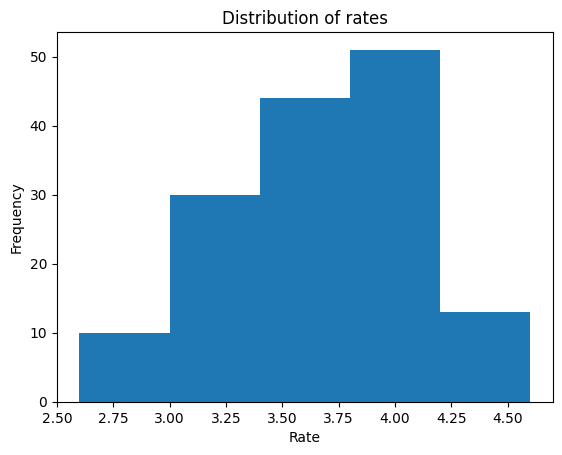

In [22]:
plt.hist(data['rate'],bins=5)
plt.title("Distribution of rates")
plt.xlabel("Rate")
plt.ylabel("Frequency")

The majority of rating is between 3.75 and 4.25

Text(0.5, 0, 'Which is more popular online or offline order')

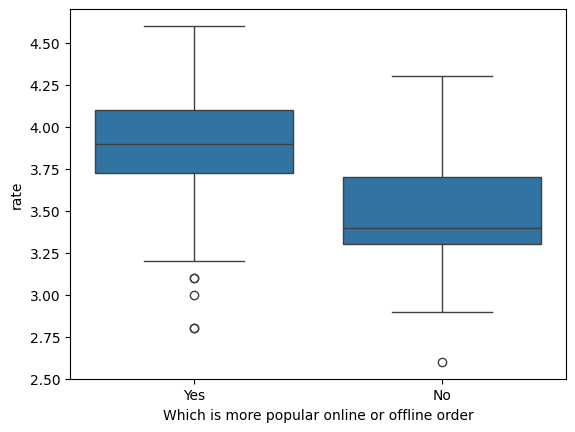

In [25]:
sns.boxplot(x=data['online_order'],y=data['rate'])
plt.xlabel("Which is more popular online or offline order")

Online rating has more rating than offline

In [26]:
pivot_table=pd.pivot_table(data,index='listed_in(type)',columns='online_order',values='rate',aggfunc='mean')
pivot_table


online_order,No,Yes
listed_in(type),,
Buffet,3.700000,3.950000
Cafes,3.600000,3.853333
Dining,3.466234,3.818182
other,3.550000,4.033333


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

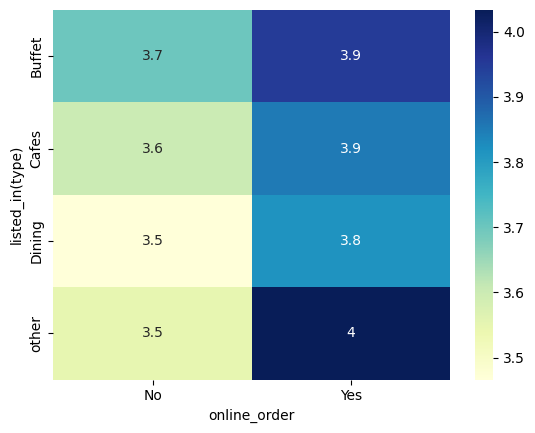

In [30]:
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu")

Dinning restaurent recieves offline orders,cafe and buffet recieves online